In [2]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
X, y = make_blobs(n_samples = 100, centers = 3, n_features = 2, random_state = 42, cluster_std = 2)
X

array([[ -8.57321463,  -9.90980404],
       [  6.26691327,  -0.48855895],
       [ -3.44814639,  10.09940622],
       [  7.44546746,  -0.83053244],
       [ -6.16405247,  -5.75854054],
       [  2.65880619,   0.84057422],
       [ -1.84667076,  10.96537638],
       [  4.20053506,   2.68739483],
       [  4.83403393,   3.91045967],
       [ -4.81118478,   9.76568216],
       [ -3.59796307,   9.23613131],
       [ -6.42470732,  -4.26582408],
       [ -5.83574406,  -6.28614025],
       [ -4.72186757,   6.62187288],
       [ -1.03226446,   9.35702269],
       [ -9.02141219,  -5.91516476],
       [ -6.32624559,  -5.2257431 ],
       [ -2.65321787,  11.02135192],
       [ -8.64734206,  -6.57265938],
       [ -5.93315194,  -7.02576742],
       [ -3.43603301,   8.08282662],
       [ -7.03383061,  -6.19780564],
       [ -7.7726571 ,  -5.167312  ],
       [ -1.78640641,  12.09035926],
       [ -2.5808497 ,  12.14357344],
       [ -3.43047516,  11.12853058],
       [  1.80913735,   1.13187904],
 

In [4]:
set(y)

{0, 1, 2}

In [5]:
df = pd.DataFrame()
df['class'] = y
df['x1'] = X[:, 0]
df['x2'] = X[:, 1]
df.sort_values('class')

,class,x1,x2
99,0,-4.187633,8.395861
84,0,-2.536192,6.898864
23,0,-1.786406,12.090359
24,0,-2.580850,12.143573
56,0,-4.534860,9.642781
...,...,...,...
33,2,-4.562436,-8.521474
75,2,-4.952875,-6.054548
77,2,-6.763210,-9.166050
29,2,-9.353529,-9.521023


<Axes: xlabel='x1', ylabel='x2'>

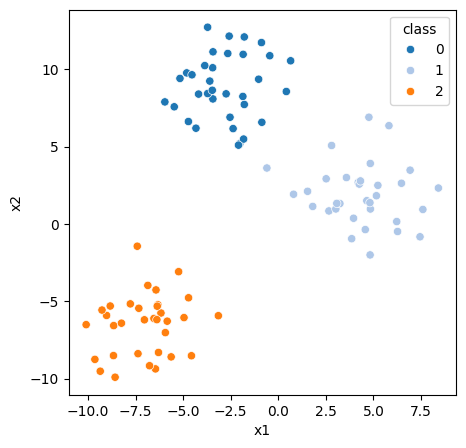

In [6]:
import seaborn as sns

plt.figure(figsize=(5,5))
sns.scatterplot(x = 'x1', y = 'x2', hue = 'class', data = df, legend = 'full', palette = 'tab20')

## Step 1
Randomly pick 𝒌 data points as our initial Centroids.

In [7]:
k = 3

# Step 1

idx = np.random.choice(range(len(X)),k)
centroids = X[idx, :]
idx

array([78, 38, 18])

In [8]:
centroids

array([[ 8.41225064,  2.32232531],
       [ 6.47068307,  2.6306719 ],
       [-8.64734206, -6.57265938]])

## Step 2
Find the distance between each data points in our training set with the 𝒌 centroids.

In [9]:
from scipy.spatial.distance import cdist

# Step 2
distances = cdist(X, centroids, metric='euclidean')
distances

array([[20.93157946, 19.58525963,  3.33796785],
       [ 3.53603489,  3.12587959, 16.10749174],
       [14.18280668, 12.41632676, 17.46394591],
       [ 3.29775404,  3.5958504 , 17.08656022],
       [16.66640349, 15.16625951,  2.6133344 ],
       [ 5.94118754,  4.21127713, 13.51980106],
       [13.41446235, 11.77478974, 18.81041809],
       [ 4.227508  ,  2.27085655, 15.83718885],
       [ 3.91481871,  2.07761332, 17.07756668],
       [15.17441285, 13.34874202, 16.78265495],
       [13.85806432, 12.04199855, 16.59560458],
       [16.23388536, 14.62370508,  3.20337233],
       [16.64665228, 15.19729212,  2.82615933],
       [13.81995552, 11.8828816 , 13.76608265],
       [11.77649493, 10.0766074 , 17.65627871],
       [19.28182673, 17.69283301,  0.75645729],
       [16.55888305, 15.01614597,  2.68359317],
       [14.07542743, 12.39552659, 18.5870589 ],
       [19.23929458, 17.69903926,  0.        ],
       [17.12242427, 15.71947656,  2.75175124],
       [13.17441463, 11.30791822, 15.554

## Step 3
Now assign each data point to the closest centroid

In [10]:
# Step 3
points = np.argmin(distances, axis=1)
points

array([2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1], dtype=int64)

## Step 4
Update centroid location by taking the average of the points in each cluster group.


In [11]:
# Step 4
temp_centroids = []

for cluster in range(k):
    # Update
    temp_cluster_centroid = [np.mean(X[points == cluster][:, 0]), np.mean(X[points == cluster][:, 1])]
    temp_centroids.append(temp_cluster_centroid)

temp_centroids = np.array(temp_centroids)
temp_centroids

array([[ 7.81779501,  0.80947404],
       [ 0.3796926 ,  5.64955789],
       [-7.02379204, -6.47232379]])

# Step 5
Centroid change? Convergence

In [12]:
centroids, temp_centroids

(array([[ 8.41225064,  2.32232531],
        [ 6.47068307,  2.6306719 ],
        [-8.64734206, -6.57265938]]),
 array([[ 7.81779501,  0.80947404],
        [ 0.3796926 ,  5.64955789],
        [-7.02379204, -6.47232379]]))

In [13]:
# Step 5
if ( (centroids == temp_centroids).all() ):
    print("Done")
else:
    print("Not Done")
    centroids = temp_centroids

Not Done


# All together

In [14]:
def kmeans(X, k):
    
    # Step 1
    # YOUR CODE HERE
    k = 3

    # Step 1

    idx = np.random.choice(range(len(X)),k)
    centroids = X[idx, :]
    
    while True:
        # Step 2
        # YOUR CODE HERE
        distances = cdist(X, centroids, metric='euclidean')


        # Step 3
        # YOUR CODE HERE
        points = np.argmin(distances, axis=1)
    
        # Step 4
        # YOUR CODE HERE
        temp_centroids = []

        for cluster in range(k):
        # Update
            temp_cluster_centroid = [np.mean(X[points == cluster][:, 0]), np.mean(X[points == cluster][:, 1])]
            temp_centroids.append(temp_cluster_centroid)
           
        temp_centroids = np.array(temp_centroids)

        # Step 5
        if ( (centroids == temp_centroids).all() ):
            # Done
            return points, centroids

        else:
            centroids = temp_centroids

In [15]:
k = 3
points, centroids = kmeans(X, k)

In [16]:
centroids

array([[-7.02379204, -6.47232379],
       [-2.82641022,  8.85723525],
       [ 4.35914117,  1.90467057]])

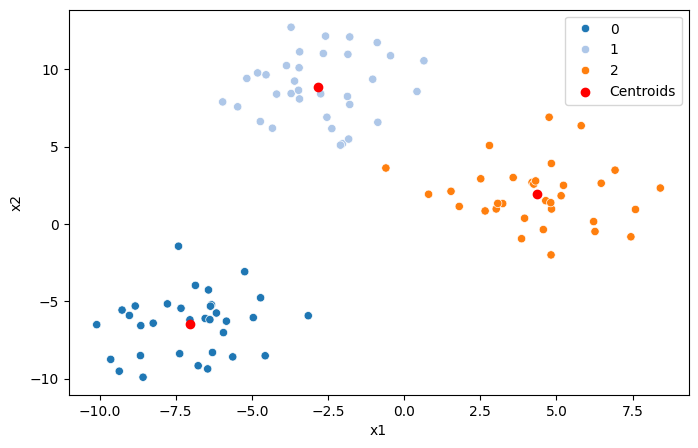

In [17]:
df = pd.DataFrame()
df['cluster'] = points
df['x1'] = X[:, 0]
df['x2'] = X[:, 1]

# plot
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'x1', y = 'x2', hue = 'cluster', data = df, legend = 'full', palette = 'tab20')
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'r', label = 'Centroids')
plt.legend()